In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Excel/Biochemical_parameters.csv", names=["ID", "Data", "Parametro", "Valore"])

indici_da_droppare = df[df['Parametro'] == 'Name'].index
df = df.drop(indici_da_droppare)
df1 = df

df2 = pd.read_csv("Excel/Diagnostics.csv", names=["ID", "Codice", "Complicanza"])

df.describe()

ID        Data   Parametro Valore
count       87482       87482       87482  87482
unique        723        1370          17   8192
top     LIB193438  2021-04-14  Creatinine    0.7
freq          846         254        8495   2638

In [6]:
def modified_z_score(series):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return np.zeros_like(series)
    return 0.6745 * (series - median) / mad

# Dizionario con unitÃ , intervallo normale e intervallo fuori norma (ma possibili)
param_info = {
    "Creatinine": {"unit": "mg/dL", "normal": (0.6, 1.2), "abnormal": (1.3, 4.0)},
    "Glucose": {"unit": "mg/dL", "normal": (70, 100), "abnormal": ((0, 69), (101, 140))},
    "Potassium": {"unit": "mEq/L", "normal": (3.5, 5.0), "abnormal": ((0, 3.4), (5.1, 6.5))},
    "Sodium": {"unit": "mEq/L", "normal": (136, 146), "abnormal": ((0, 135), (147, 155))},
    "Alanine transaminase (GPT)": {"unit": "U/L", "normal": (7, 56), "abnormal": (57, 100)},
    "Gamma-glutamyl Transferase (GGT)": {"unit": "U/L", "normal": (8, 61), "abnormal": (62, 200)},
    "Total cholesterol": {"unit": "mg/dL", "normal": (0, 200), "abnormal": (201, 299)},
    "Triglycerides": {"unit": "mg/dL", "normal": (0, 150), "abnormal": (151, 500)},
    "HDL cholesterol": {"unit": "mg/dL", "normal": (40, None), "abnormal": (0, 39)},
    "Uric acid": {"unit": "mg/dL", "normal": (3.0, 8.2), "abnormal": ((0, 2.9), (8.3, 12.0))},
    "Glycated hemoglobin (A1c)": {"unit": "%", "normal": (0, 5.7), "abnormal": (5.8, 14.0)},
    "Thyrotropin (TSH)": {"unit": "mIU/L", "normal": (0.4, 4.0), "abnormal": (4.1, 20.0)},
    "Creatinine (urine)": {"unit": "mg/die", "normal": (500, 2000), "abnormal": ((0, 499), (2001, 5000))},
    "Albumin (urine)": {"unit": "mg/die", "normal": (0, 30), "abnormal": (31, 300)},
    "Chlorine": {"unit": "mEq/L", "normal": (95, 105), "abnormal": ((0, 94), (106, 120))},
    "IA2 ANTIBODIES": {"unit": "U/mL", "normal": (0.0, 7.4), "abnormal": (7.5, 100.0)},
    "Insulin": {"unit": "ÂµIU/mL", "normal": (2.6, 24.9), "abnormal": (25.0, 100.0)}
}

def analisi_parametri(df):
    summary = []
    
    df = df[df["Parametro"] != "Name"]

    for nome, gruppo in df.groupby("Parametro"):
        valori = pd.to_numeric(gruppo["Valore"], errors='coerce')
        totale = len(valori)
        id_unici = gruppo["ID"].nunique()
        mancanti = 723 - id_unici
        
        min = valori.min()
        max = valori.max()
        mean= valori.mean()
        std_val = valori.std()
        # Modified Z-score
        z_scores = modified_z_score(valori)
        z_outliers_idx = np.where(np.abs(z_scores) > 5)[0]
        
        # Valori negativi
        valori_negativi_idx = valori[valori < 0].index

        # Unione degli outlier evitando doppioni
        outlier_idx_unici = set(z_outliers_idx).union(valori_negativi_idx)
        outliers = len(outlier_idx_unici)

        info = param_info.get(nome, {})
        unit = info.get("unit", "")
        normal = info.get("normal", (None, None))
        abnormal = info.get("abnormal", None)

        summary.append([
            nome,
            unit,
            f"{normal[0]}â€“{normal[1] if normal[1] is not None else ''}",
            str(abnormal),
            totale,
            mancanti,
            min,
            mean,
            max,
            std_val,
            outliers,
        ])
    
    return pd.DataFrame(summary, columns=[
        "Parametro",
        "UnitÃ ",
        "Range Normale",
        "Range Fuori Norma (possibile)",
        "Valori Totali",
        "Non Hanno Fatto lâ€™Esame",
        "Minimo",
        "Media",
        "Massimo",
        "Dev. Std",
        "Outliers",
    ])

# Esegui e stampa
tabella_sintesi = analisi_parametri(df)
tabella_sintesi

Parametro   UnitÃ  Range Normale  \
0         Alanine transaminase (GPT)     U/L          7â€“56   
1                    Albumin (urine)  mg/die          0â€“30   
2                           Chlorine   mEq/L        95â€“105   
3                         Creatinine   mg/dL       0.6â€“1.2   
4                 Creatinine (urine)  mg/die      500â€“2000   
5   Gamma-glutamyl Transferase (GGT)     U/L          8â€“61   
6                            Glucose   mg/dL        70â€“100   
7          Glycated hemoglobin (A1c)       %         0â€“5.7   
8                    HDL cholesterol   mg/dL           40â€“   
9                     IA2 ANTIBODIES    U/mL       0.0â€“7.4   
10                           Insulin  ÂµIU/mL      2.6â€“24.9   
11                         Potassium   mEq/L       3.5â€“5.0   
12                            Sodium   mEq/L       136â€“146   
13                 Thyrotropin (TSH)   mIU/L       0.4â€“4.0   
14                 Total cholesterol   mg/dL         0â€“200   
15                     Triglycerides   mg/dL         0â€“150   
16                         Uric acid   mg/dL       3.0â€“8.2   

   Range Fuori Norma (possibile)  Valori Totali  Non Hanno Fatto lâ€™Esame  \
0                      (57, 100)           7134                        1   
1                      (31, 300)           4283                       10   
2          ((0, 94), (106, 120))           1935                      300   
3                     (1.3, 4.0)           8495                        0   
4       ((0, 499), (2001, 5000))           4412                       10   
5                      (62, 200)           6085                        7   
6          ((0, 69), (101, 140))           8349                        0   
7                    (5.8, 14.0)           4776                        3   
8                        (0, 39)           5062                        6   
9                   (7.5, 100.0)             66                      659   
10                 (25.0, 100.0)             64                      674   
11        ((0, 3.4), (5.1, 6.5))           7853                        1   
12        ((0, 135), (147, 155))           7814                        1   
13                   (4.1, 20.0)           4570                        9   
14                    (201, 299)           5954                        3   
15                    (151, 500)           5791                        3   
16       ((0, 2.9), (8.3, 12.0))           4839                       15   

     Minimo       Media  Massimo     Dev. Std  Outliers  
0    -4.000   26.981679   868.00    44.617123       302  
1     0.010    4.863133   992.20    26.560691         0  
2    76.000  102.961395   136.00     5.339634         9  
3     0.150    1.044406    11.55     0.947799       656  
4     2.000  114.140306   543.46    66.798995         7  
5     5.000   43.800016  2051.00   113.549983       642  
6    10.000  163.035274   979.00    85.403559        41  
7     4.000    7.823137    18.00     1.385512        48  
8     7.000   56.626827   137.00    14.367272         8  
9     0.210  409.637424  6446.74  1237.697950        25  
10    0.740   22.694688   298.50    40.537998         6  
11    1.900    4.430804    22.60     0.658540        37  
12  117.000  138.163053   168.00     3.466266        32  
13    0.006    2.866165   204.89     4.679146       108  
14   27.000  169.454825   703.00    39.933470        13  
15   23.000  102.973925  3447.00    94.692856       184  
16    1.000    4.392238    14.20     1.537233        20

In [7]:
ids_con_complicanze = df2["ID"].unique()

# 2. Dividiamo df1 in due dataset
df_con_complicanze = df1[df1["ID"].isin(ids_con_complicanze)]
df_senza_complicanze = df1[~df1["ID"].isin(ids_con_complicanze)]

# 3. Eseguiamo analisi_parametri su ciascuno
tabella_con = analisi_parametri(df_con_complicanze)
tabella_senza = analisi_parametri(df_senza_complicanze)

tabella_con

Parametro   UnitÃ  Range Normale  \
0         Alanine transaminase (GPT)     U/L          7â€“56   
1                    Albumin (urine)  mg/die          0â€“30   
2                           Chlorine   mEq/L        95â€“105   
3                         Creatinine   mg/dL       0.6â€“1.2   
4                 Creatinine (urine)  mg/die      500â€“2000   
5   Gamma-glutamyl Transferase (GGT)     U/L          8â€“61   
6                            Glucose   mg/dL        70â€“100   
7          Glycated hemoglobin (A1c)       %         0â€“5.7   
8                    HDL cholesterol   mg/dL           40â€“   
9                     IA2 ANTIBODIES    U/mL       0.0â€“7.4   
10                           Insulin  ÂµIU/mL      2.6â€“24.9   
11                         Potassium   mEq/L       3.5â€“5.0   
12                            Sodium   mEq/L       136â€“146   
13                 Thyrotropin (TSH)   mIU/L       0.4â€“4.0   
14                 Total cholesterol   mg/dL         0â€“200   
15                     Triglycerides   mg/dL         0â€“150   
16                         Uric acid   mg/dL       3.0â€“8.2   

   Range Fuori Norma (possibile)  Valori Totali  Non Hanno Fatto lâ€™Esame  \
0                      (57, 100)           5545                      225   
1                      (31, 300)           3162                      228   
2          ((0, 94), (106, 120))           1635                      407   
3                     (1.3, 4.0)           6684                      225   
4       ((0, 499), (2001, 5000))           3267                      228   
5                      (62, 200)           4724                      228   
6          ((0, 69), (101, 140))           6547                      225   
7                    (5.8, 14.0)           3490                      226   
8                        (0, 39)           3787                      228   
9                   (7.5, 100.0)             40                      683   
10                 (25.0, 100.0)             41                      692   
11        ((0, 3.4), (5.1, 6.5))           6181                      226   
12        ((0, 135), (147, 155))           6140                      226   
13                   (4.1, 20.0)           3371                      231   
14                    (201, 299)           4520                      227   
15                    (151, 500)           4386                      227   
16       ((0, 2.9), (8.3, 12.0))           3674                      234   

     Minimo       Media  Massimo     Dev. Std  Outliers  
0    -4.000   28.036339   868.00    46.747188       266  
1     0.120    5.705658   992.20    29.828967         0  
2    76.000  102.986116   136.00     5.533705         9  
3     0.150    1.088235    11.55     1.025362       517  
4     2.000  106.331301   515.79    63.222186         8  
5     5.000   46.240157  1903.00   111.824547       507  
6    13.000  164.128914   790.00    84.477618        27  
7     4.000    7.810946    16.40     1.353676        29  
8     7.000   56.778189   132.00    14.687407         6  
9     0.210  182.815750  6446.74  1016.574265        14  
10    0.740   21.626098   298.50    45.458724         1  
11    1.900    4.452459    22.60     0.661280        30  
12  117.000  138.094756   168.00     3.535835        26  
13    0.006    2.925733   204.89     5.224457        92  
14   27.000  169.472792   703.00    41.143419        13  
15   23.000  107.182399  3447.00   101.320384       144  
16    1.500    4.456543    14.20     1.586919        16

In [8]:
tabella_senza

Parametro   UnitÃ  Range Normale  \
0         Alanine transaminase (GPT)     U/L          7â€“56   
1                    Albumin (urine)  mg/die          0â€“30   
2                           Chlorine   mEq/L        95â€“105   
3                         Creatinine   mg/dL       0.6â€“1.2   
4                 Creatinine (urine)  mg/die      500â€“2000   
5   Gamma-glutamyl Transferase (GGT)     U/L          8â€“61   
6                            Glucose   mg/dL        70â€“100   
7          Glycated hemoglobin (A1c)       %         0â€“5.7   
8                    HDL cholesterol   mg/dL           40â€“   
9                     IA2 ANTIBODIES    U/mL       0.0â€“7.4   
10                           Insulin  ÂµIU/mL      2.6â€“24.9   
11                         Potassium   mEq/L       3.5â€“5.0   
12                            Sodium   mEq/L       136â€“146   
13                 Thyrotropin (TSH)   mIU/L       0.4â€“4.0   
14                 Total cholesterol   mg/dL         0â€“200   
15                     Triglycerides   mg/dL         0â€“150   
16                         Uric acid   mg/dL       3.0â€“8.2   

   Range Fuori Norma (possibile)  Valori Totali  Non Hanno Fatto lâ€™Esame  \
0                      (57, 100)           1589                      499   
1                      (31, 300)           1121                      505   
2          ((0, 94), (106, 120))            300                      616   
3                     (1.3, 4.0)           1811                      498   
4       ((0, 499), (2001, 5000))           1145                      505   
5                      (62, 200)           1361                      502   
6          ((0, 69), (101, 140))           1802                      498   
7                    (5.8, 14.0)           1286                      500   
8                        (0, 39)           1275                      501   
9                   (7.5, 100.0)             26                      699   
10                 (25.0, 100.0)             23                      705   
11        ((0, 3.4), (5.1, 6.5))           1672                      498   
12        ((0, 135), (147, 155))           1674                      498   
13                   (4.1, 20.0)           1199                      501   
14                    (201, 299)           1434                      499   
15                    (151, 500)           1405                      499   
16       ((0, 2.9), (8.3, 12.0))           1165                      504   

     Minimo       Media  Massimo     Dev. Std  Outliers  
0     6.000   23.301322   709.00    35.987192        44  
1     0.010    2.486628   354.07    13.352830         0  
2    86.000  102.826667   121.00     4.129584         2  
3     0.300    0.882645     5.34     0.548145        65  
4    12.000  136.421546   543.46    71.572846         2  
5     5.000   35.330345  2051.00   119.000301        99  
6    10.000  159.061876   979.00    88.596858        16  
7     4.700    7.856221    18.00     1.468472        19  
8    20.000   56.177255   137.00    13.366702         1  
9     0.280  758.593846  5683.21  1470.316832        11  
10    1.530   24.599565   105.34    30.703605         6  
11    2.500    4.350748    20.20     0.642190         6  
12  121.000  138.413560   165.00     3.186652         6  
13    0.008    2.698688    63.50     2.585104        15  
14   84.000  169.398194   338.00    35.866886         1  
15   23.000   89.836299  1151.00    68.467163        40  
16    1.000    4.189442    12.10     1.349477         9

<Figure size 1400x800 with 0 Axes>

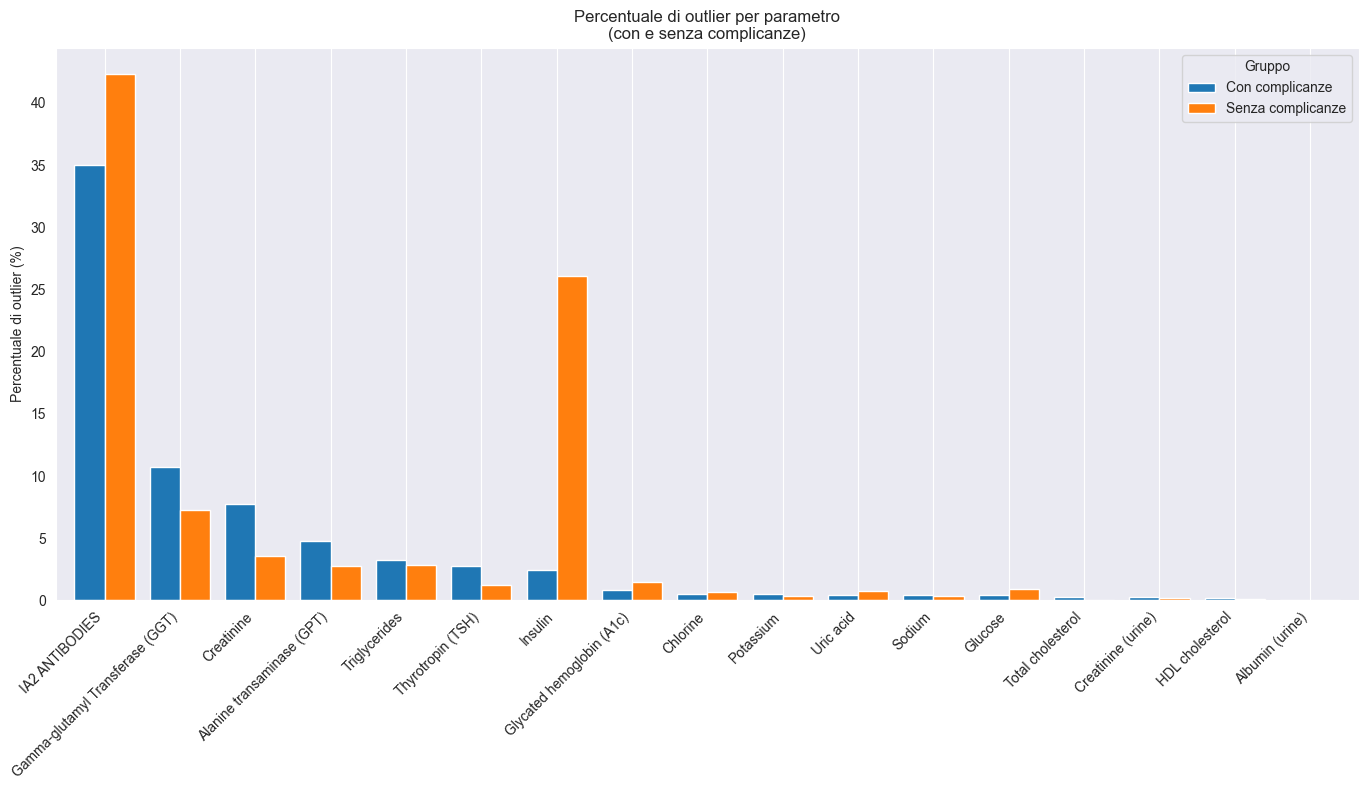

In [31]:
def calcola_percentuali_outlier(df, etichetta):
    percentuali = {}
    for parametro, gruppo in df.groupby("Parametro"):
        valori = pd.to_numeric(gruppo["Valore"], errors="coerce").dropna()
        if len(valori) > 0:
            z_scores = modified_z_score(valori)
            outliers = np.abs(z_scores) > 5
            percentuali[parametro] = 100 * outliers.sum() / len(valori)
        else:
            percentuali[parametro] = 0.0
    return pd.Series(percentuali, name=etichetta)

# Calcola le percentuali di outlier per ciascun gruppo
percentuali_con = calcola_percentuali_outlier(df_con_complicanze, "Con complicanze")
percentuali_senza = calcola_percentuali_outlier(df_senza_complicanze, "Senza complicanze")

# Combina i risultati in un unico DataFrame
df_outliers = pd.concat([percentuali_con, percentuali_senza], axis=1).fillna(0)
df_outliers = df_outliers.sort_values(by="Con complicanze", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
df_outliers.plot(kind="bar", figsize=(14, 8), width=0.8)
plt.ylabel("Percentuale di outlier (%)")
plt.title("Percentuale di outlier per parametro\n(con e senza complicanze)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title="Gruppo")
plt.show()

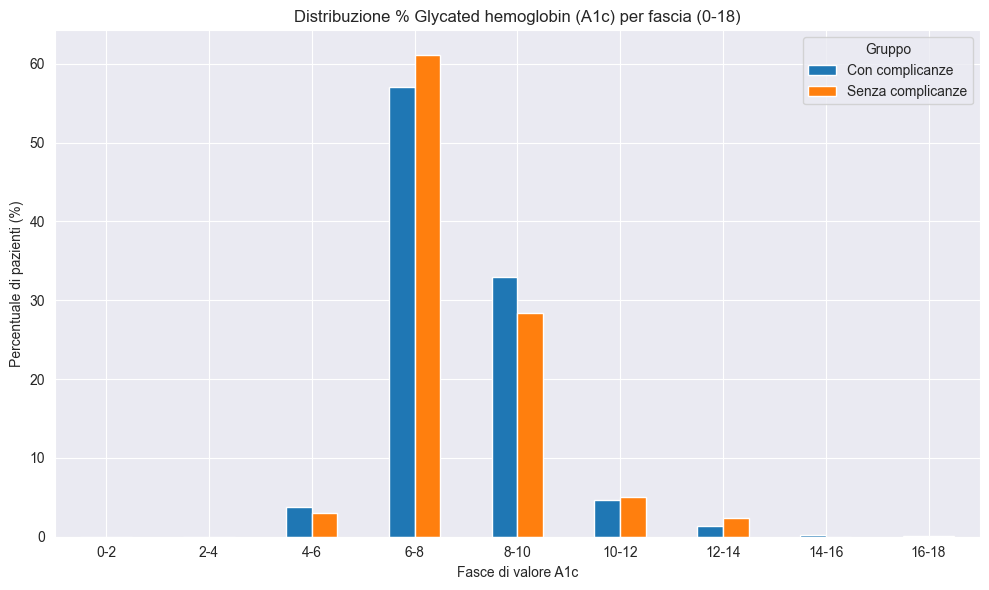

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Filtra solo i valori A1c
a1c_con_raw = df_con_complicanze[df_con_complicanze["Parametro"] == "Glycated hemoglobin (A1c)"]
a1c_senza_raw = df_senza_complicanze[df_senza_complicanze["Parametro"] == "Glycated hemoglobin (A1c)"]

# 2. Converte in numerico (float), rimuovendo eventuali errori
a1c_con = pd.to_numeric(a1c_con_raw["Valore"], errors="coerce").dropna()
a1c_senza = pd.to_numeric(a1c_senza_raw["Valore"], errors="coerce").dropna()

# 3. Definisci le fasce 0â€“2, 2â€“4, ..., 16â€“18
bins = np.arange(0, 20, 2)
labels = [f"{i}-{i+2}" for i in bins[:-1]]

# 4. Fasce con pd.cut()
a1c_con_binned = pd.cut(a1c_con, bins=bins, labels=labels, right=False)
a1c_senza_binned = pd.cut(a1c_senza, bins=bins, labels=labels, right=False)

# 5. Frequenze normalizzate (percentuali)
freq_con = a1c_con_binned.value_counts(normalize=True).sort_index() * 100
freq_senza = a1c_senza_binned.value_counts(normalize=True).sort_index() * 100

# 6. Crea DataFrame per il grafico
df_plot = pd.DataFrame({
    "Con complicanze": freq_con,
    "Senza complicanze": freq_senza
})

# 7. Plot
df_plot.plot(kind="bar", figsize=(10, 6))
plt.title("Distribuzione % Glycated hemoglobin (A1c) per fascia (0-18)")
plt.xlabel("Fasce di valore A1c")
plt.ylabel("Percentuale di pazienti (%)")
plt.xticks(rotation=0)
plt.legend(title="Gruppo")
plt.tight_layout()
plt.show()

In [17]:
df1["Data"] = pd.to_datetime(df1["Data"])

# Ottieni la prima data per ogni parametro per ciascun paziente
first_dates = df1.groupby(["ID", "Parametro"])["Data"].min().reset_index()
first_dates

ID                   Parametro       Data
0      LIB193265  Alanine transaminase (GPT) 2018-09-05
1      LIB193265             Albumin (urine) 2021-01-18
2      LIB193265                    Chlorine 2018-09-05
3      LIB193265                  Creatinine 2018-09-05
4      LIB193265          Creatinine (urine) 2021-01-18
...          ...                         ...        ...
10584  LIB194166                      Sodium 2020-12-10
10585  LIB194166           Thyrotropin (TSH) 2020-12-10
10586  LIB194166           Total cholesterol 2020-12-10
10587  LIB194166               Triglycerides 2020-12-10
10588  LIB194166                   Uric acid 2022-02-10

[10589 rows x 3 columns]

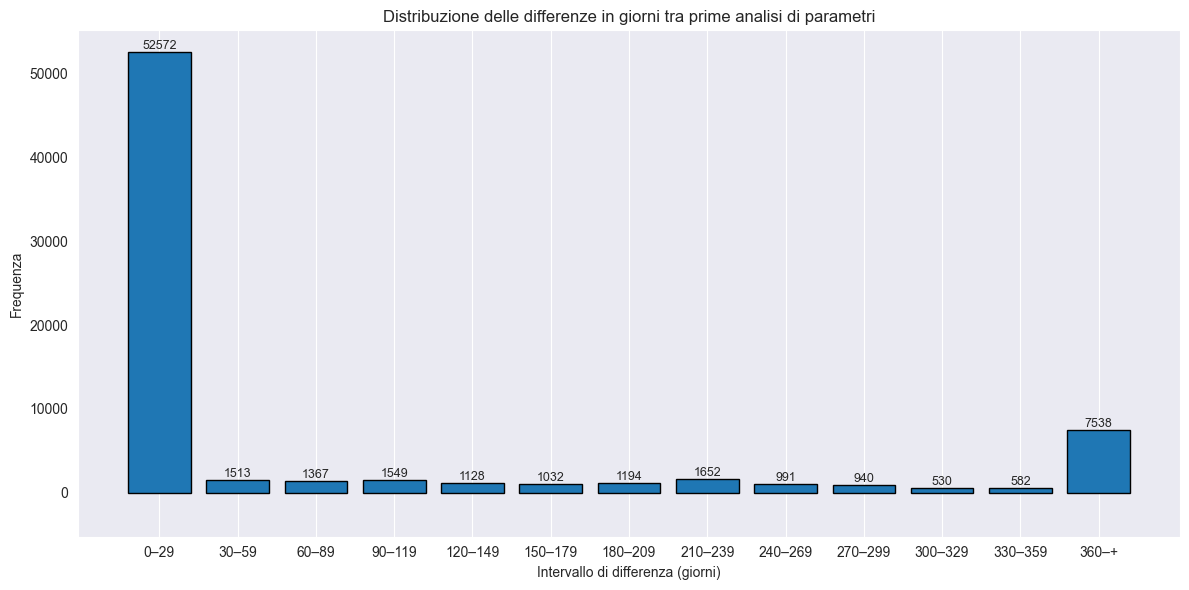

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

records = []

for patient_id, group in first_dates.groupby("ID"):
    params = group.set_index("Parametro")["Data"].to_dict()
    for (p1, p2) in combinations(params.keys(), 2):
        delta = abs((params[p1] - params[p2]).days)
        records.append({
            "ID": patient_id,
            "Parametro 1": p1,
            "Parametro 2": p2,
            "Differenza giorni": delta
        })

df_diff = pd.DataFrame(records)

# ðŸŽ¯ Definizione intervalli
bin_ranges = [(i, i+29) for i in range(0, 360, 30)]
bin_ranges.append((360, float('inf')))  # Ultimo intervallo: 360+

# Etichette leggibili
bin_labels = [f"{start}â€“{end if end != float('inf') else '+'}" for start, end in bin_ranges]

# Conta quanti valori cadono in ciascun intervallo
bin_counts = []
for start, end in bin_ranges:
    count = df_diff[
        (df_diff["Differenza giorni"] >= start) &
        (df_diff["Differenza giorni"] <= end if end != float('inf') else True)
    ].shape[0]
    bin_counts.append(count)

# ðŸŽ¨ Grafico a barre con larghezza costante
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_labels, bin_counts, edgecolor='black')

# Etichette sopra e sotto
for bar, count in zip(bars, bin_counts):
    x = bar.get_x() + bar.get_width() / 2
    if count > 0:
        plt.text(x, count, str(count), ha='center', va='bottom', fontsize=9)

plt.title("Distribuzione delle differenze in giorni tra prime analisi di parametri")
plt.xlabel("Intervallo di differenza (giorni)")
plt.ylabel("Frequenza")
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(bottom=-max(bin_counts)*0.1)
plt.show()

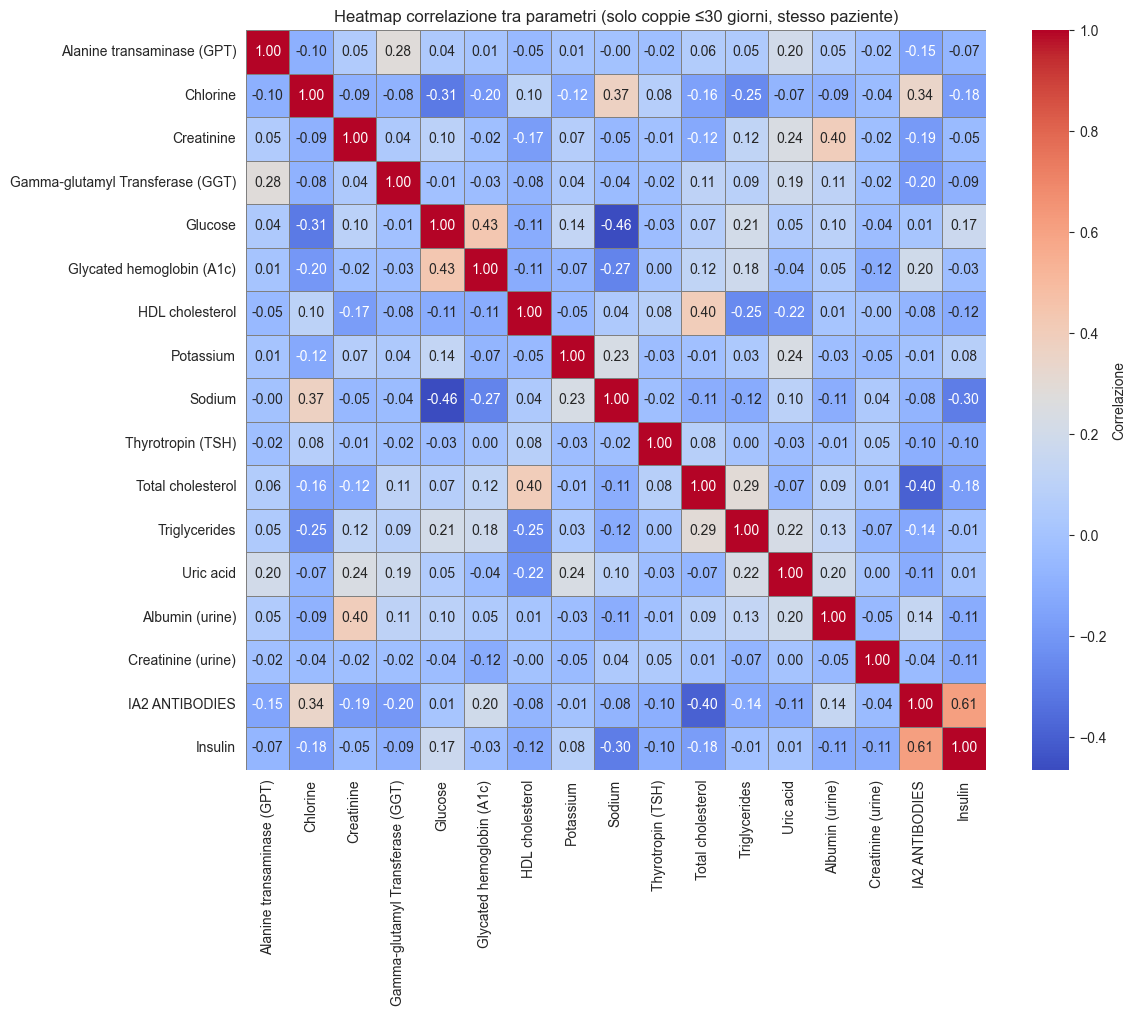

In [21]:
records = []

# Analisi per paziente
for patient_id, group in first_dates.groupby("ID"):
    # Dizionari per data e valore per parametro
    date_dict = group.set_index("Parametro")["Data"].to_dict()
    value_dict = df1[df1["ID"] == patient_id].groupby("Parametro")["Valore"].first().to_dict()

    for p1, p2 in combinations(date_dict.keys(), 2):
        delta_days = abs((date_dict[p1] - date_dict[p2]).days)
        if delta_days <= 30:
            val1 = pd.to_numeric(value_dict.get(p1), errors="coerce")
            val2 = pd.to_numeric(value_dict.get(p2), errors="coerce")
            if pd.notna(val1) and pd.notna(val2):
                records.append({
                    "ID": patient_id,
                    p1: val1,
                    p2: val2
                })

# Trasforma in DataFrame
df_corr_raw = pd.DataFrame(records)

# Raggruppa per ID e calcola la media dei valori duplicati
df_corr_wide = df_corr_raw.groupby("ID").mean(numeric_only=True)

# Calcola matrice di correlazione
correlation_matrix = df_corr_wide.corr()

# Plot della heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={'label': 'Correlazione'}, linewidths=0.5, linecolor='gray')
plt.title("Heatmap correlazione tra parametri (solo coppie â‰¤30 giorni, stesso paziente)")
plt.tight_layout()
plt.show()

C:\Users\gabry\AppData\Local\Temp\ipykernel_26560\950137647.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_complicanze["Complicanze"] = "Con complicanze"
C:\Users\gabry\AppData\Local\Temp\ipykernel_26560\950137647.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senza_complicanze["Complicanze"] = "Senza complicanze"


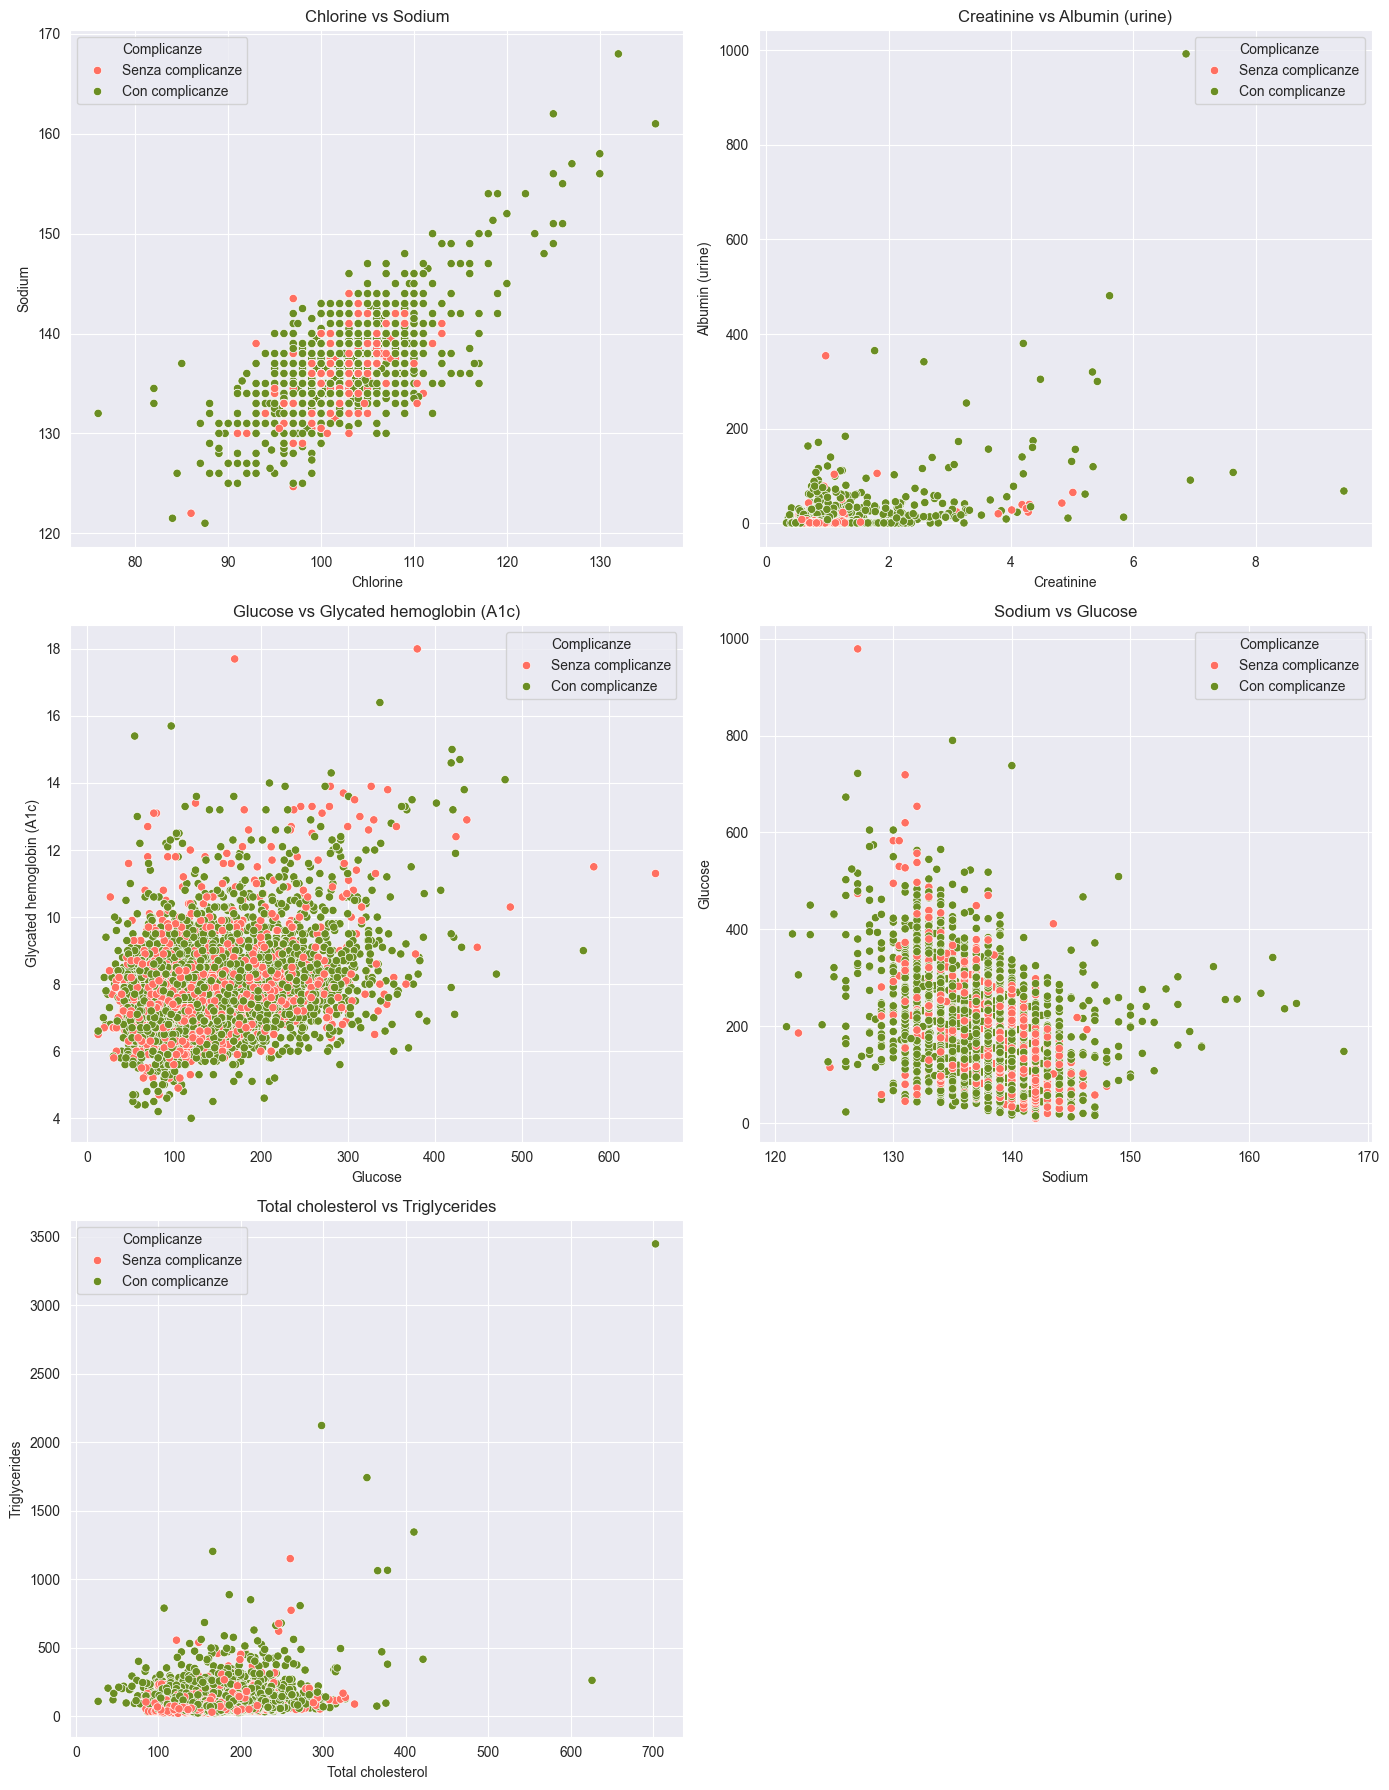

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parametri interessanti dalla heatmap (puoi modificarli o estenderli)
combinazioni_interessanti = [
    ("Chlorine", "Sodium"),
    #("Chlorine", "IA2 ANTIBODIES"),
    ("Creatinine", "Albumin (urine)"),
    ("Glucose", "Glycated hemoglobin (A1c)"),
    ("Sodium", "Glucose"),  # Correlazione negativa
    ("Total cholesterol", "Triglycerides"),
    #("Total cholesterol", "IA2 ANTIBODIES"), # Correlazione negativa
    #("IA2 ANTIBODIES", "Insulin")
]

# Crea la colonna "Complicanze"
df_con_complicanze["Complicanze"] = "Con complicanze"
df_senza_complicanze["Complicanze"] = "Senza complicanze"

# Unione dei due dataset
df_merged = pd.concat([df_con_complicanze, df_senza_complicanze], ignore_index=True)

# Conversione a numerico e datetime
df_merged["Valore"] = pd.to_numeric(df_merged["Valore"], errors="coerce")
df_merged["Data"] = pd.to_datetime(df_merged["Data"], errors="coerce")

# Prepara i subplot
n = len(combinazioni_interessanti)
cols = 2
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

# Loop per ogni coppia
for i, (p1, p2) in enumerate(combinazioni_interessanti):
    df_wide = df_merged.pivot_table(
        index=["ID", "Data", "Complicanze"],
        columns="Parametro",
        values="Valore",
        aggfunc="mean"
    ).reset_index()

    if p1 in df_wide.columns and p2 in df_wide.columns:
        df_plot = df_wide[[p1, p2, "Complicanze"]].dropna()

        sns.scatterplot(data=df_plot, x=p1, y=p2, hue="Complicanze",
                        palette=["#FF6F61", "#6B8E23"], ax=axes[i])
        axes[i].set_title(f"{p1} vs {p2}")
        axes[i].grid(True)
    else:
        axes[i].text(0.5, 0.5, f"Parametri non trovati:\n{p1}, {p2}",
                     ha='center', va='center')
        axes[i].set_axis_off()

# Rimuove eventuali assi in eccesso
for j in range(i + 1, len(axes)):
    axes[j].set_axis_off()

plt.tight_layout()
plt.show()